In [1]:
## Load libraries

import csv
from textblob import TextBlob
import os
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
##Check current working directory

os.getcwd()

'C:\\Users\\on846\\Downloads\\Edwisor notes\\Predictive analysis using R and Python_Module_2\\Analytics Basics'

In [3]:
##Change current working directory

os.chdir("C:\\Users\\on846\\Downloads\\Edwisor notes\\Projects\\Project_5")

In [4]:
## Load the data

df = pd.read_csv("clothing.csv",index_col=0) ## index_col = 0 will use 1st column as index which is what we want

In [5]:
## Feeling the data

df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
##Renaming Review text variable as Text

df = df.rename(columns={'Review Text':'Text'})

In [7]:
df.head(5)

,Clothing ID,Age,Title,Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.shape

(23486, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Text                       22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [10]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


### Our main focus will be on Review Text ,Recommended IND, Rating and Positive Feedback Count..
### For visualisation of data , we will check the distribution of Age ,Rating, Recommended IND or not, Division Name , Department Name, Class Name

### Then we will use text mining pre processing and NLP methods to filter out the redundant text data and will apply Sentiment Analysis using the filtered data and will create wordcloud to check the distribution of data

## Visualization 

C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


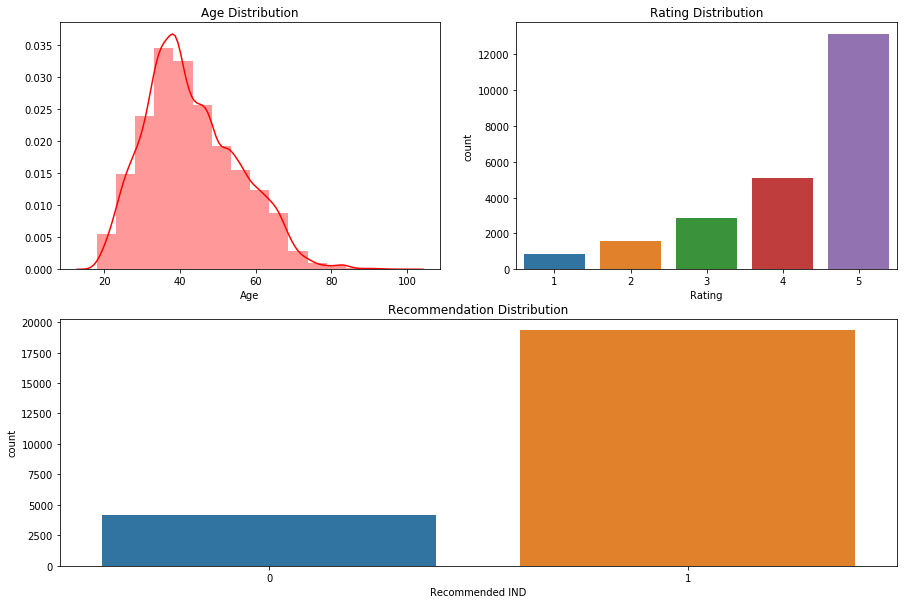

In [13]:
## Checking the distribution of Age ,Rating and Recommendation column

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1 = sns.distplot(df['Age'],bins = 16,color ='red')
ax1 = plt.title("Age Distribution")

ax2 = plt.subplot2grid((2,2),(0,1))
ax2 = sns.countplot(x = "Rating",data=df)
ax2 = plt.title("Rating Distribution")

ax3 = plt.subplot2grid((2,2),(1,0),colspan=2)
ax3 = sns.countplot(x="Recommended IND",data=df)
ax3 = plt.title("Recommendation Distribution")

### Insights from above figure:

#### 30 to 50 years of women are pretty active in texting thei reviews
#### 5 being the highest rating is being given most of the time
#### The product recommendation is higher as compared to non - recommendation

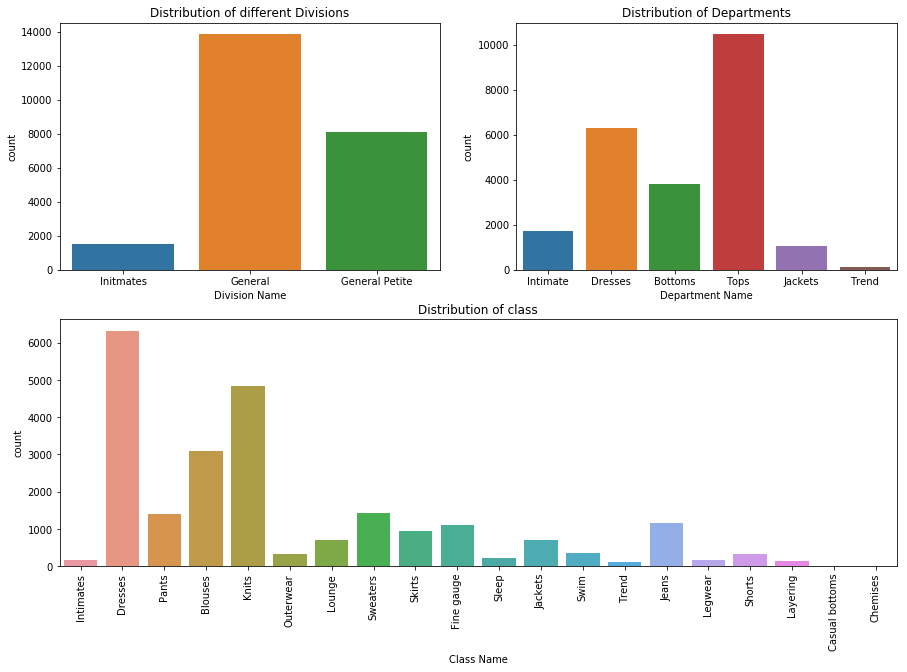

In [14]:
## Distribution of different Division name, Department name and class name##

fig1 = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1 = sns.countplot(x = "Division Name", data=df)
ax1 = plt.title("Distribution of different Divisions")

ax2 = plt.subplot2grid((2,2),(0,1))
ax2 = sns.countplot(x= 'Department Name',data=df)
ax2 = plt.title("Distribution of Departments")

ax3 = plt.subplot2grid((2,2),(1,0),colspan=2)
ax3 = sns.countplot(x = "Class Name", data=df)
ax3 = plt.title("Distribution of class")
ax3 = plt.xticks(rotation =90)

### Insights from above figure:

#### Count of General category in Division name is highest and intimates being the lowest
#### Count of Tops category in Department name is highest and Trend is lowests.. These are just counts 

In [15]:
## Now we will dig deep into the data and see how many are recommended and how many are not recommended in division ,departmen and class name 


recommended_yes = df[df['Recommended IND']==1]
recommended_no = df[df['Recommended IND']==0]

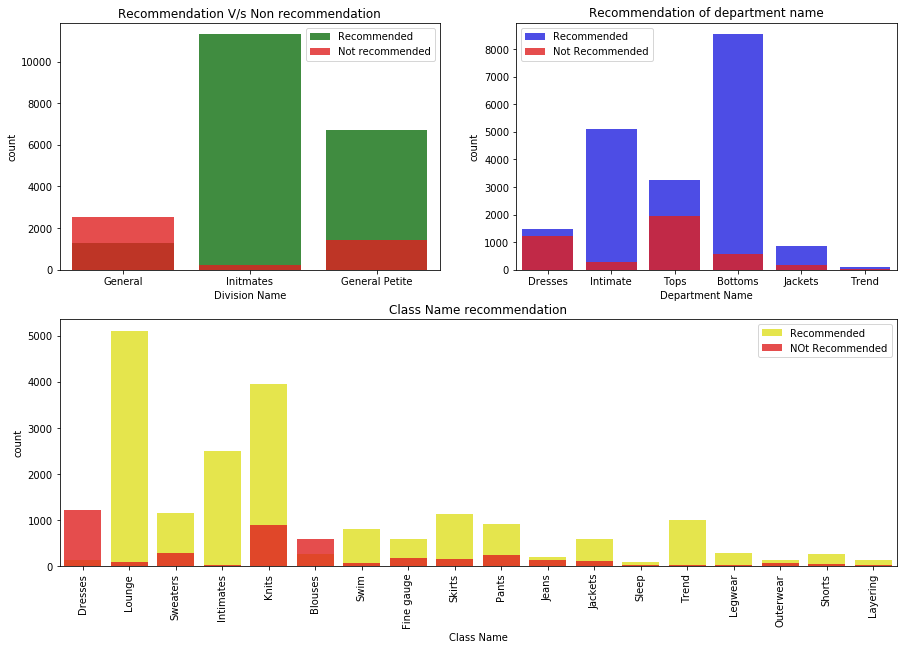

In [16]:
fig2 = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1 = sns.countplot(x=recommended_yes['Division Name'],color='green',alpha =0.8, label = 'Recommended')
ax1 = sns.countplot(x=recommended_no['Division Name'],color='red',alpha = 0.8,label = 'Not recommended')
ax1 = plt.title("Recommendation V/s Non recommendation")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2,2),(0,1))
ax2 = sns.countplot(x = recommended_yes['Department Name'],color = 'blue',alpha = 0.8, label = 'Recommended')
ax2 = sns.countplot(x = recommended_no['Department Name'],color = 'red',alpha = 0.8, label = 'Not Recommended')
ax2 = plt.title("Recommendation of department name")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2,2),(1,0),colspan=2)
ax3 = sns.countplot(x = recommended_yes["Class Name"],color = 'Yellow', alpha = 0.8, label = 'Recommended')
ax3 = sns.countplot(x=recommended_no['Class Name'],color = 'red',alpha = 0.8,label = 'NOt Recommended')
ax3 = plt.title("Class Name recommendation")
ax3 = plt.xticks(rotation = 90)
ax3 = plt.legend()

### Insights from above figure:

#### Intimates division is highly recommended by customer.. General needs intense care from companies point of view
#### Bottoms category is highly recommended by customer..
#### Dresses Class is in trouble

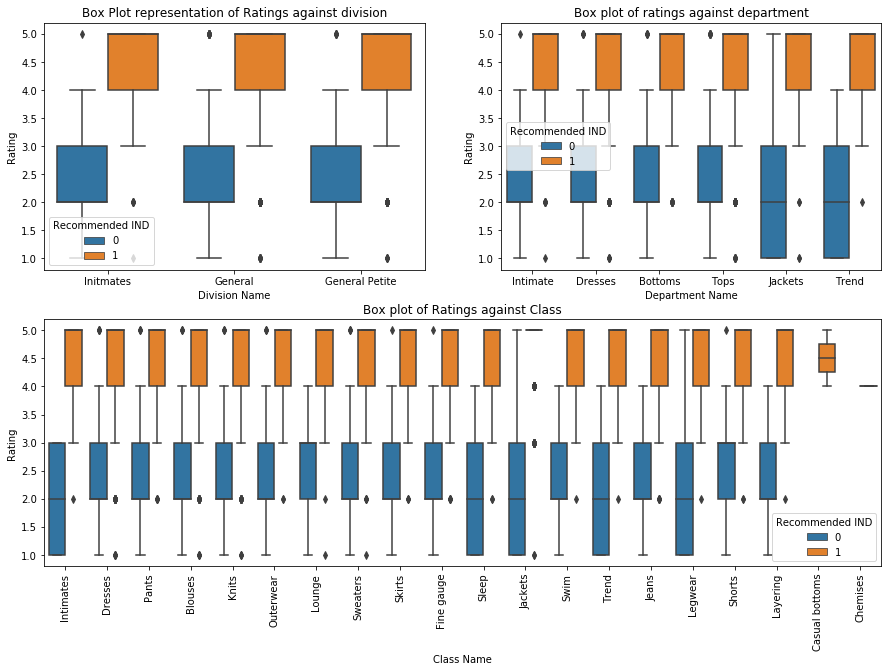

In [17]:
##3 Box plot distribution between Ratings and other variables

fig3 = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1 = sns.boxplot(x= 'Division Name',y = 'Rating',data=df,hue='Recommended IND')
ax1 = plt.title("Box Plot representation of Ratings against division")

ax2 = plt.subplot2grid((2,2),(0,1))
ax2 = sns.boxplot(x='Department Name',y = 'Rating',data=df,hue='Recommended IND')
ax2 = plt.title("Box plot of ratings against department")

ax3 = plt.subplot2grid((2,2),(1,0),colspan=2)
ax3 = sns.boxplot(x= 'Class Name',y = 'Rating',data=df,hue='Recommended IND')
ax3 = plt.title("Box plot of Ratings against Class")
ax3 = plt.xticks(rotation =90)

### Insights from above figure:

#### We can see in all above 3 figures the recommended value(1) has more rating  as compared to non recommended for all columns...
### Text Pre preocessing


In [18]:
df.head(5)

,Clothing ID,Age,Title,Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [19]:
df_sentiment = pd.DataFrame(df['Text'])

In [20]:
df_sentiment.head(5)

,Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...


In [21]:
##Extracting stop words

stop = set(stopwords.words("english"))

In [22]:
## Extract punctuation 

exclude = set(string.punctuation)

In [23]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [24]:
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [25]:
## Text pre - preocesssing

def clean (doc):
    stop_free = " ".join([i for i in str(doc).lower().split() if i not in stop])
    pun_free = " ".join([i for i in stop_free.lower().split() if i not in exclude])
    num_free = " ".join([i for i in pun_free if not i.isdigit()])
    return num_free

df_corpus = [clean(df_sentiment.iloc[i,0]) for i in range (0,df_sentiment.shape[0])]

In [26]:
df_corpus[0]

'a b s o l u t e l y   w o n d e r f u l   s i l k y   s e x y   c o m f o r t a b l e'

### WordCloud

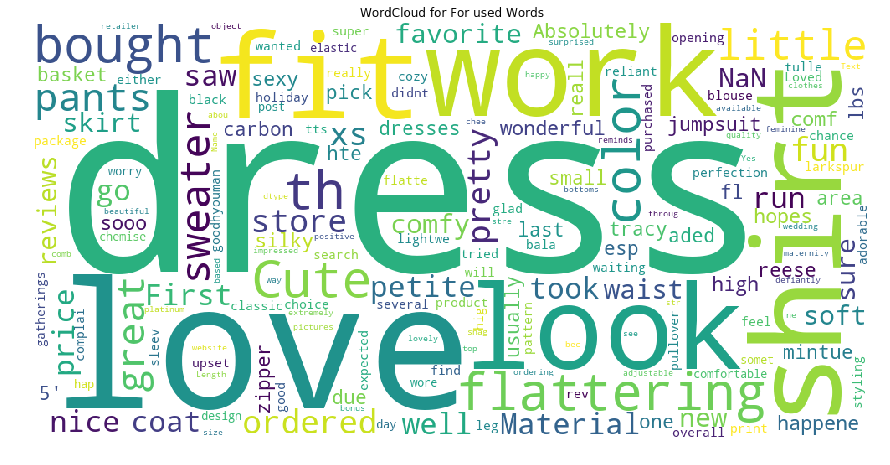

In [27]:
#Plot wordcloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(str(df_sentiment['Text'])))

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud for For used Words")
plt.show()

### Sentiment Analysis

In [28]:
## We will perform Sentiment Analysis using Textblob method:

##Create empty Data Frame

FinalResults = pd.DataFrame()

#Run Engine

for i in range(0,df_sentiment.shape[0]):
    blob = TextBlob(str(df_sentiment.iloc[i,0]))
    temp = pd.DataFrame({'Text': df_sentiment.iloc[i,0],'Polarity':blob.sentiment.polarity}, index=[0])
    
    FinalResults = FinalResults.append(temp)

In [29]:
FinalResults.head(5)

,Text,Polarity
0,Absolutely wonderful - silky and sexy and comf...,0.633333
0,Love this dress! it's sooo pretty. i happene...,0.339583
0,I had such high hopes for this dress and reall...,0.073675
0,"I love, love, love this jumpsuit. it's fun, fl...",0.550000
0,This shirt is very flattering to all due to th...,0.512891


In [34]:
##Export the polarity back to my hardisk##

FinalResults.to_csv("Sentiment_texblob.csv",index=False)

#### Distribution of Polarity



C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


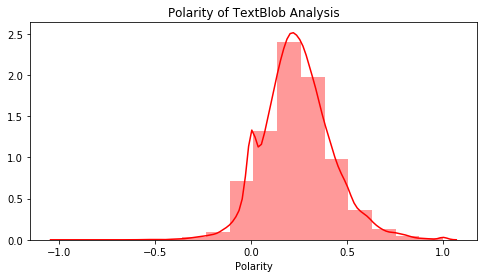

In [37]:
fig5 = plt.figure(figsize=(8,4))
ax1 = sns.distplot(FinalResults['Polarity'],bins=16,color='red')
ax1 = plt.title("Polarity of TextBlob Analysis")

In [44]:

# Sentiment Analysis using Vader
FinalResults_Vader = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, df_sentiment.shape[0]):
    
    snt = analyzer.polarity_scores(str(df_sentiment.iloc[i,0]))
    
    temp = pd.DataFrame({'Text': df_sentiment.iloc[i,0], 'Polarity': list(snt.items())[3][1]}, index = [0])

    FinalResults_Vader = FinalResults_Vader.append(temp)

In [45]:
FinalResults_Vader.head(5)

,Text,Polarity
0,Absolutely wonderful - silky and sexy and comf...,0.8932
0,Love this dress! it's sooo pretty. i happene...,0.9729
0,I had such high hopes for this dress and reall...,0.9427
0,"I love, love, love this jumpsuit. it's fun, fl...",0.5727
0,This shirt is very flattering to all due to th...,0.9291


#### VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [51]:
SentimentIntensityAnalyzer()

In [57]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [58]:
sentiment_analyzer_scores("Absolutely wonderful - silky and sexy and comfortable")

Absolutely wonderful - silky and sexy and comfortable {'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.8932}


#### Above sentence tells us about negative part ,positive part ,neutral part and compound part.. So compound is the overall rating or we can say polarity of this sentence and it will consider to be positive..

#### Distribution of polarity using vader..

C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


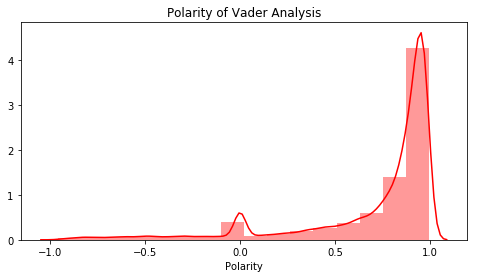

In [59]:
fig6 = plt.figure(figsize=(8,4))
ax1 = sns.distplot(FinalResults_Vader['Polarity'],bins=16,color='red')
ax1 = plt.title("Polarity of Vader Analysis")

In [60]:
## Exporting the polarity results back to my hardisk

FinalResults_Vader.to_csv("Sentiment_vader.csv",index=False)